In [66]:
import requests
import json
import seaborn

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Create token and read data from page (REST API)
token_string = requests.post('http://api.projectstats.de:80/api/Users/login', json={"username":"timon","password":"timon"})
token_json = json.loads(token.content)['id']

response_counts = requests.get('http://api.projectstats.de:80/api/Leagues/0fd25982-d945-495d-8839-5f43725ebf0a/stats?access_token=' +\
                         token_json)
response_player = requests.get('http://api.projectstats.de:80/api/Players?access_token=' +\
                         token_json)

In [29]:
# Format response to json
data = json.loads(response_counts.content)['counts']
players = json.loads(response_player.content)

In [38]:
player_id_names_dict = {player['id']: player['describableName'] for player in players}

In [41]:
active_players = [player for player in data]

In [62]:
contra_points = [data[player]['contraGamePoints'] for player in active_players]
player_names = [player_id_names_dict[active_player] for active_player in active_players]

contra_points, player_names = zip(*sorted(zip(contra_points, player_names)))

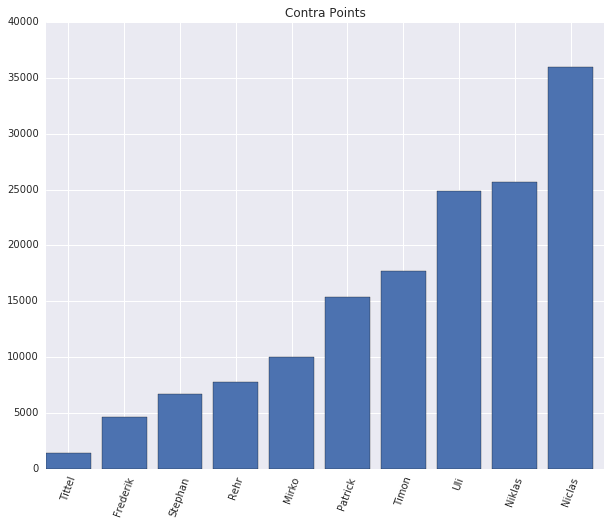

In [69]:
plt.figure(figsize=(10, 8))
plt.bar(range(len(active_players)), 
        contra_points)
plt.xticks([val + 0.4 for val in range(len(active_players))], 
           player_names,
           rotation=70)
plt.title('Contra Points')
plt.show()